**05a_model_output_analysis_roc_test**

- looked at misclassified patients by shap values for test dataset

used this container: 
ml:1.0

In [6]:
# load packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import datetime

import shap

import tarfile
import pickle as pkl

import xgboost as xgb

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn import metrics

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

import os
from urllib.parse import urlparse

from helper_functions import *

In [7]:
# define paths
base_dir = '/home/jovyan/work/Goldfinch/ML_paper/'
output_suffix = 'output_files/training_output/'
suffix = 'raw_data/intermediate_files/'

0_years_0


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


false_neg


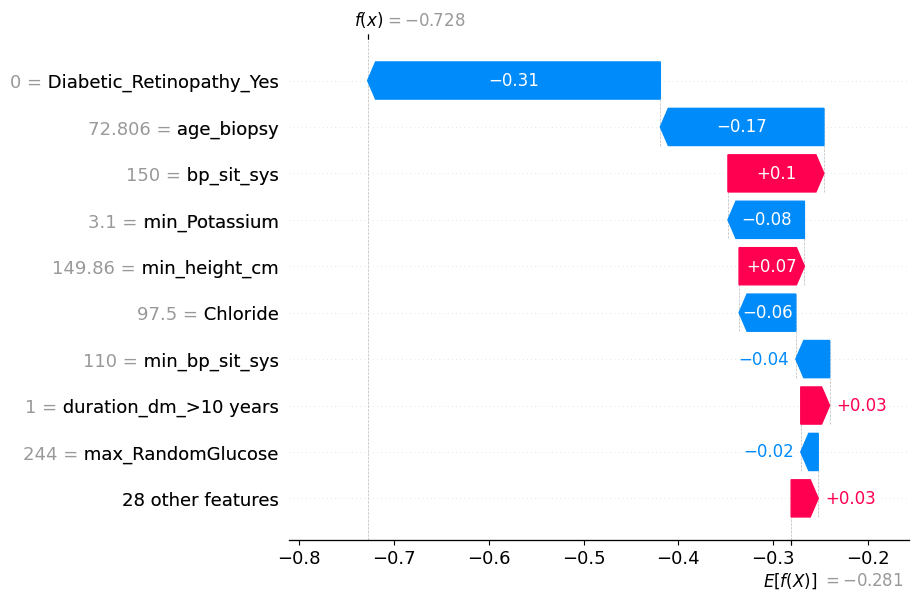

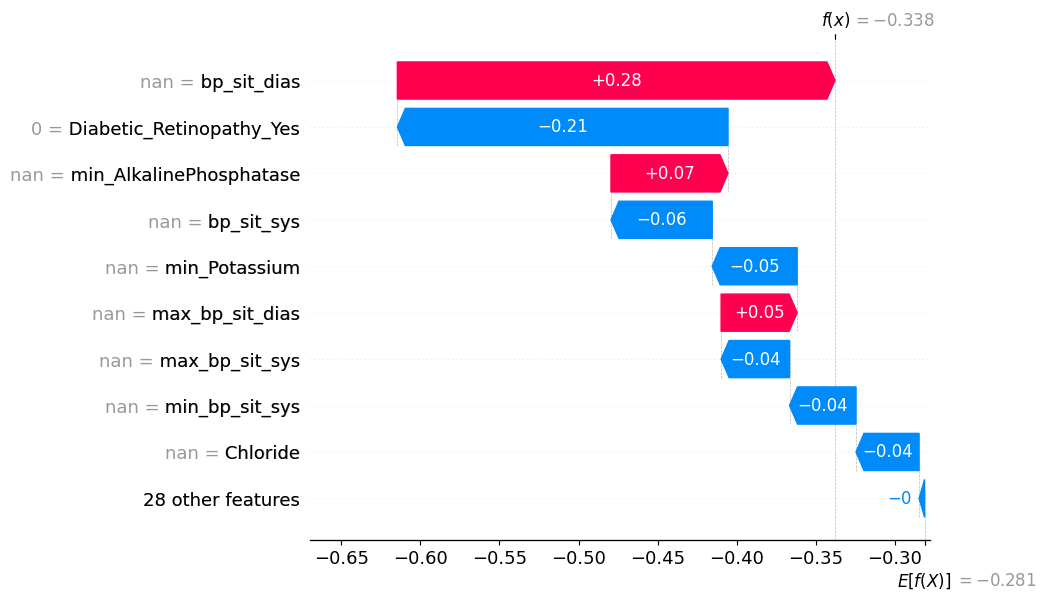

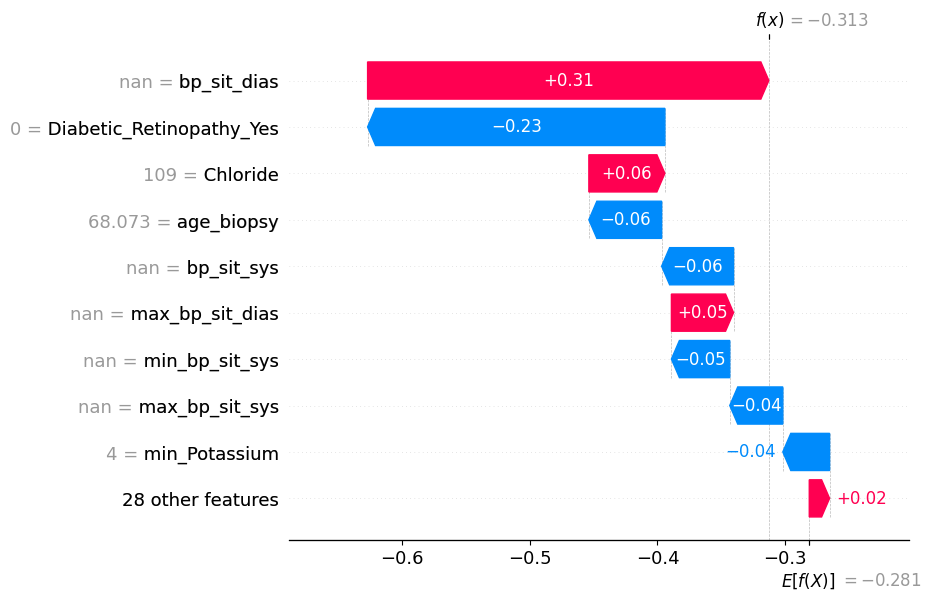

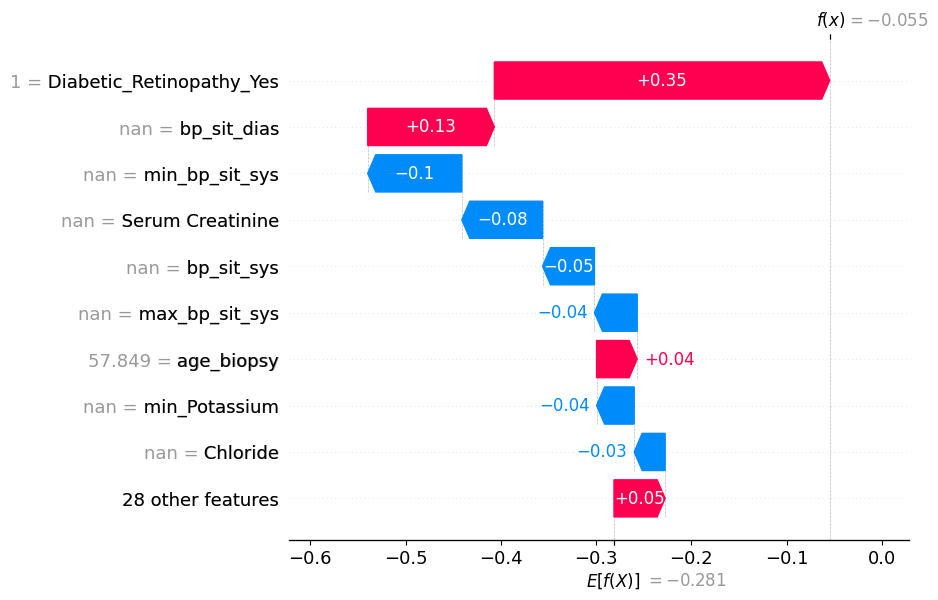

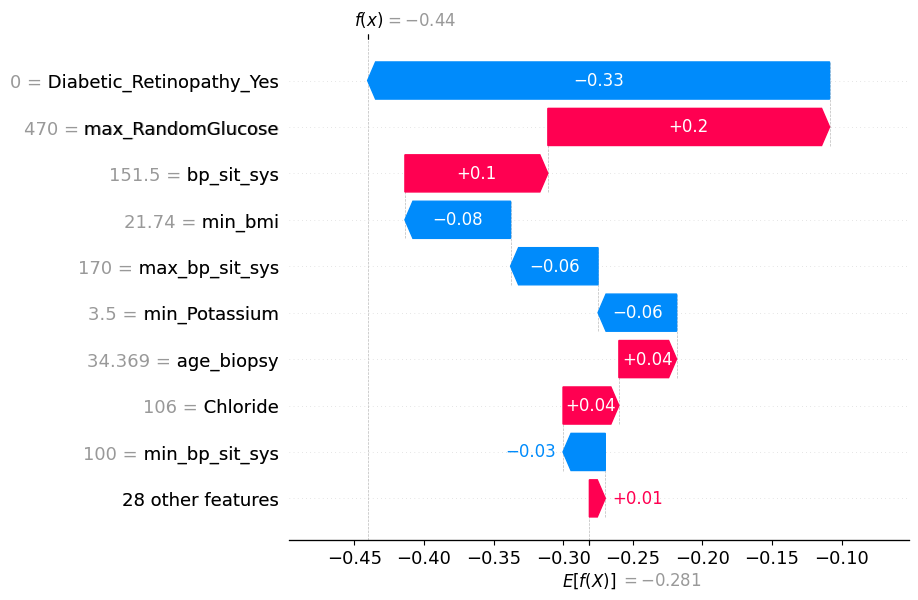

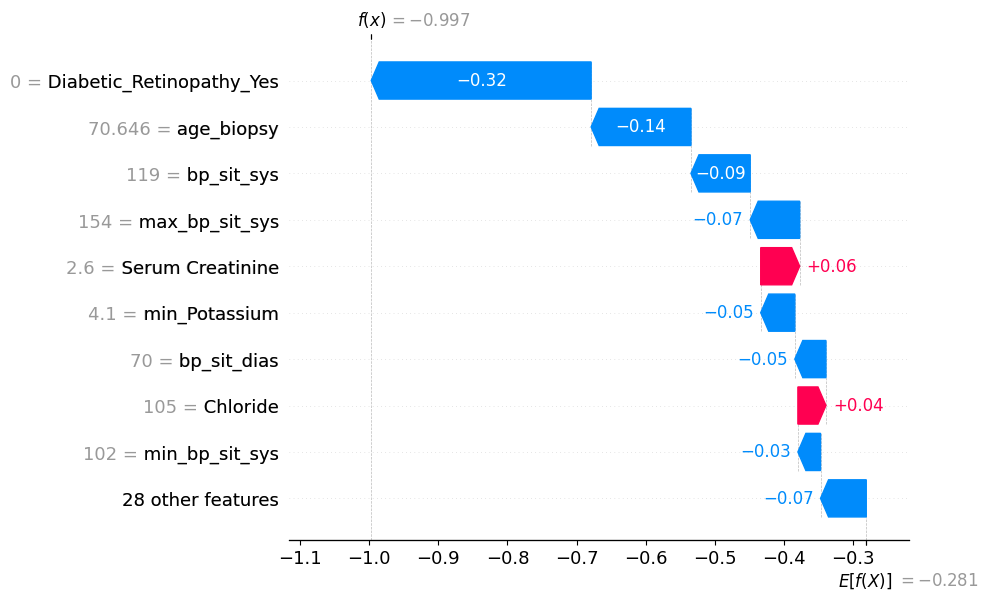

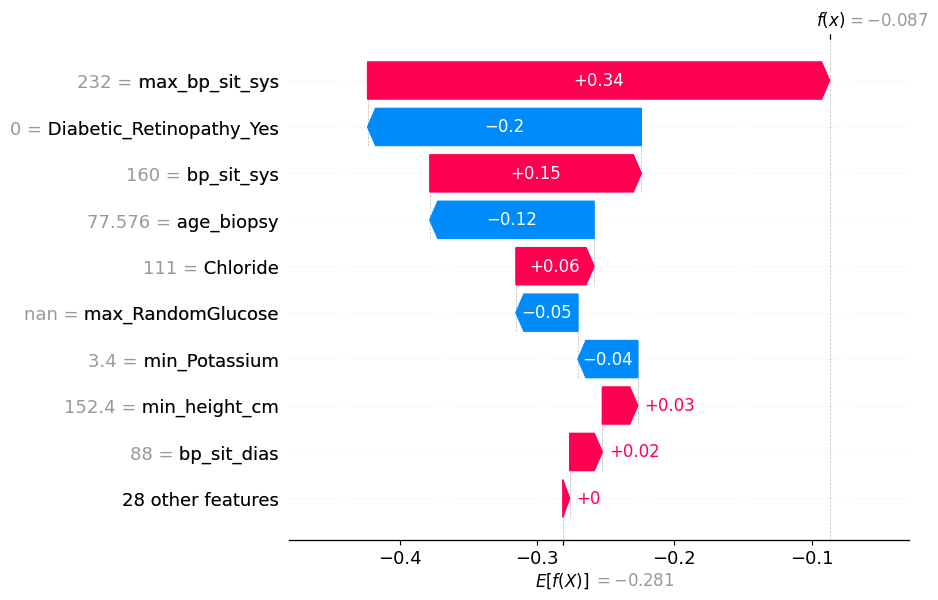

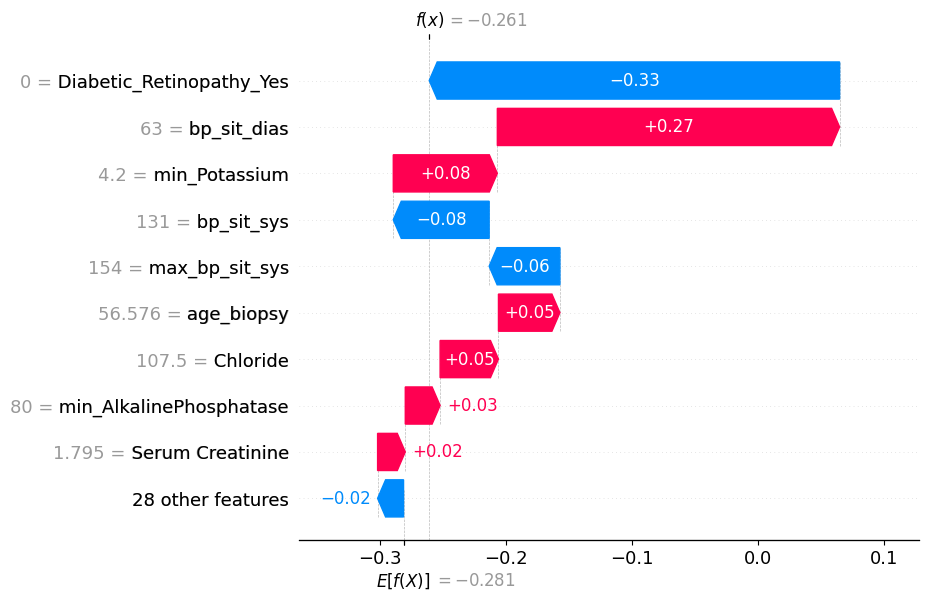

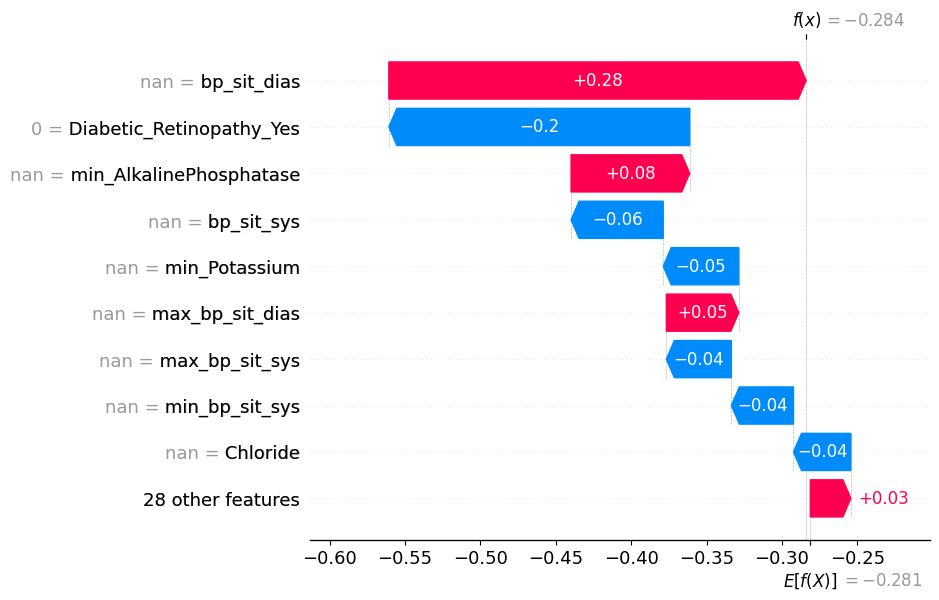

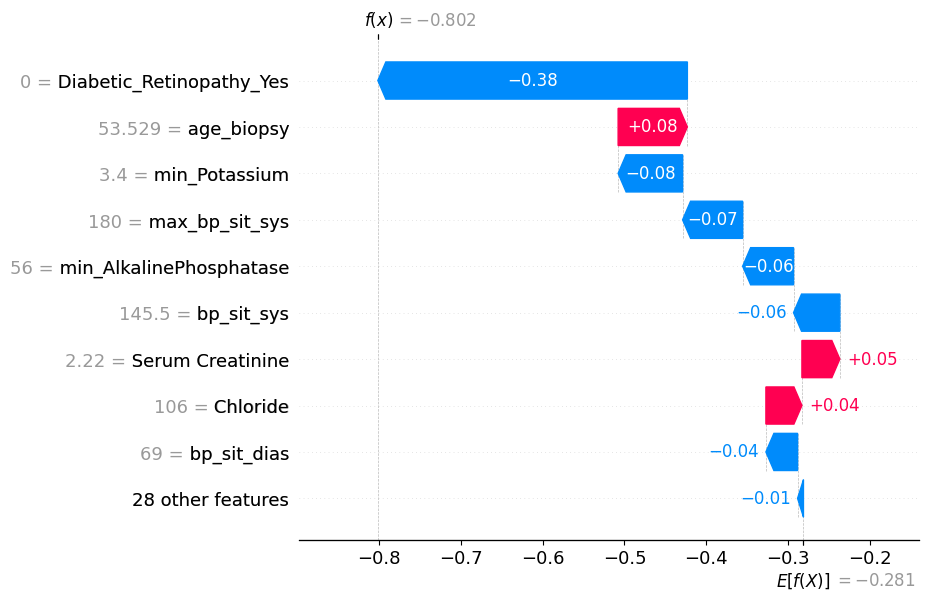

false_pos


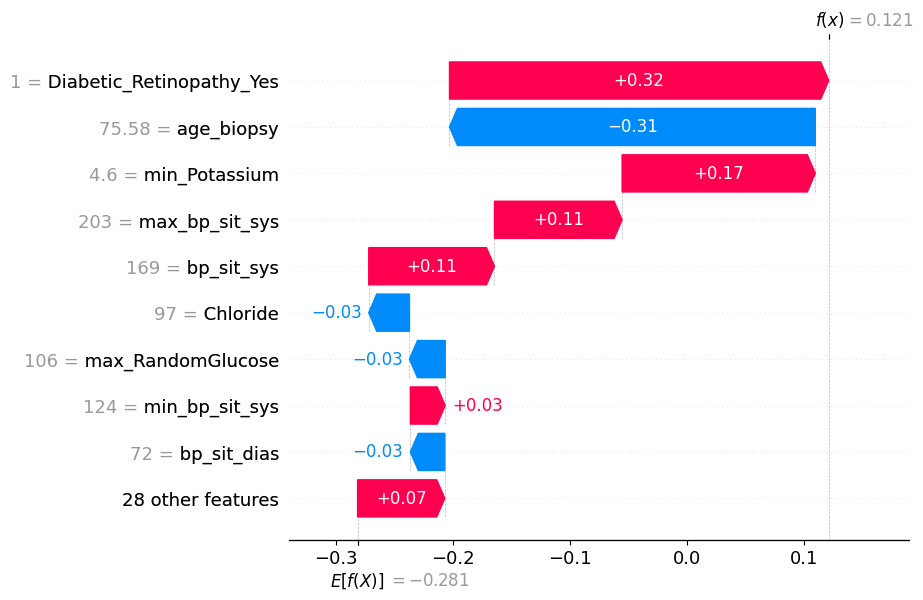

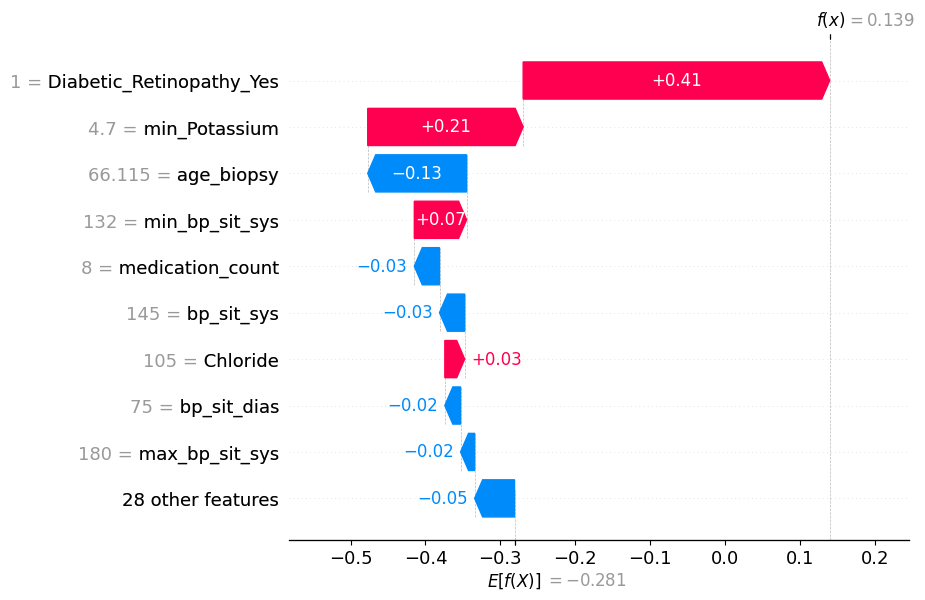

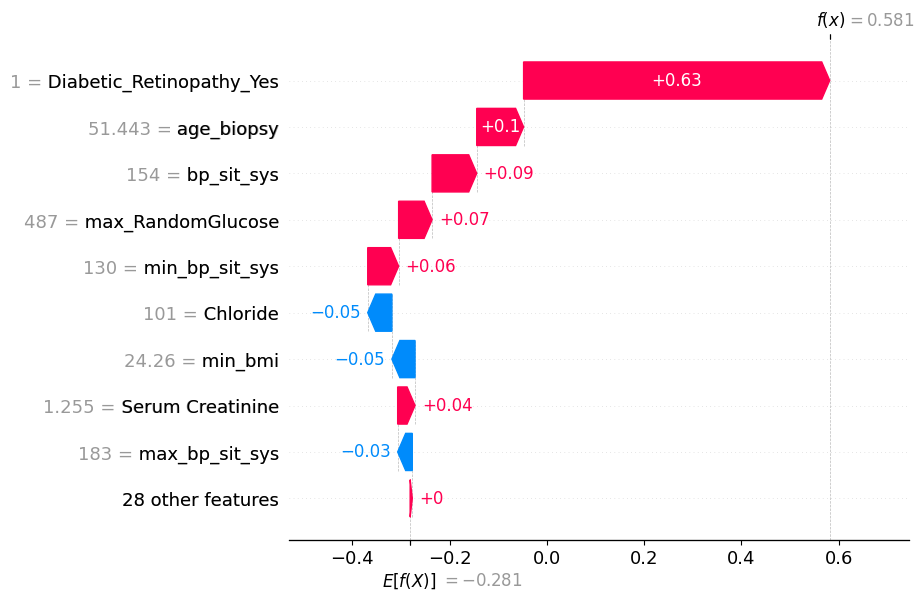

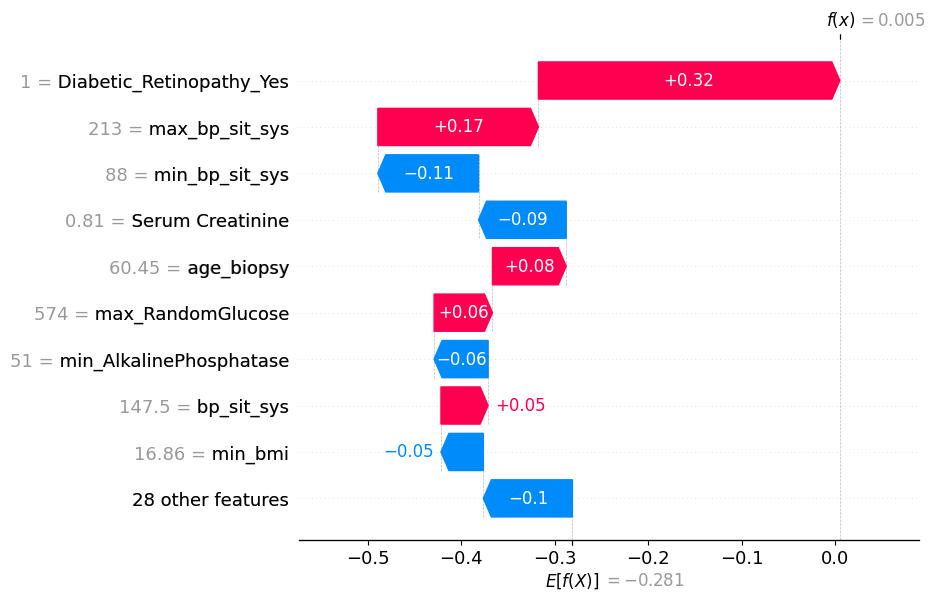

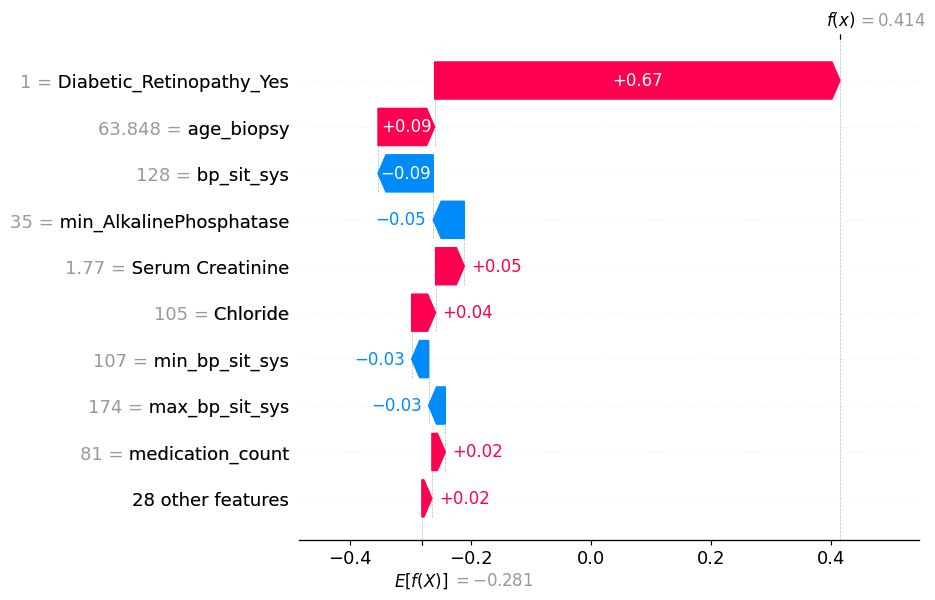

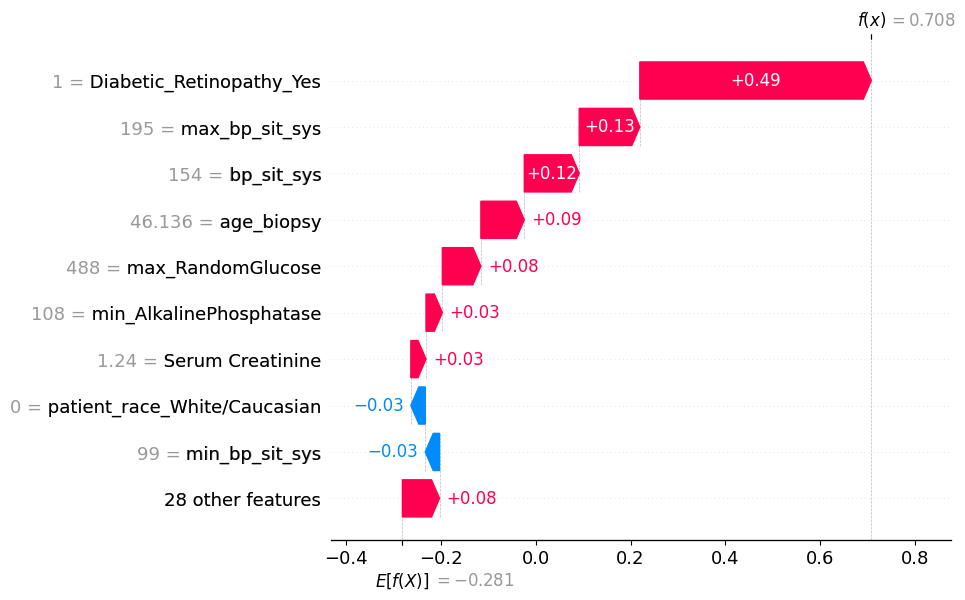

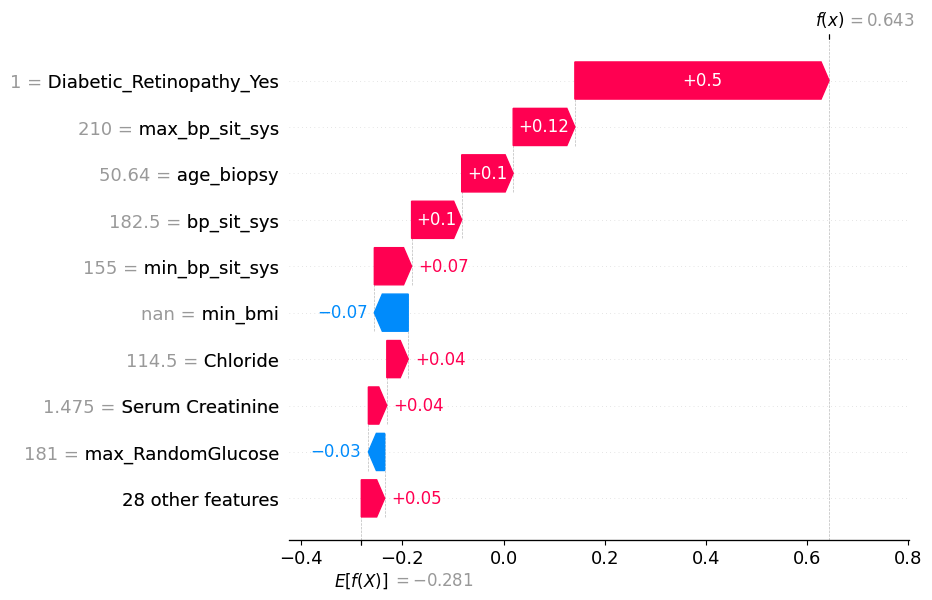

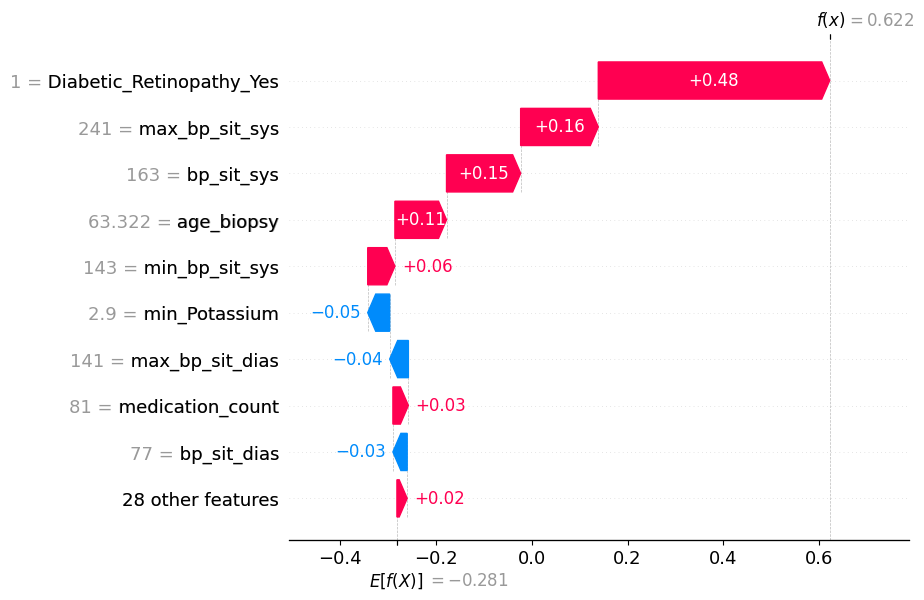

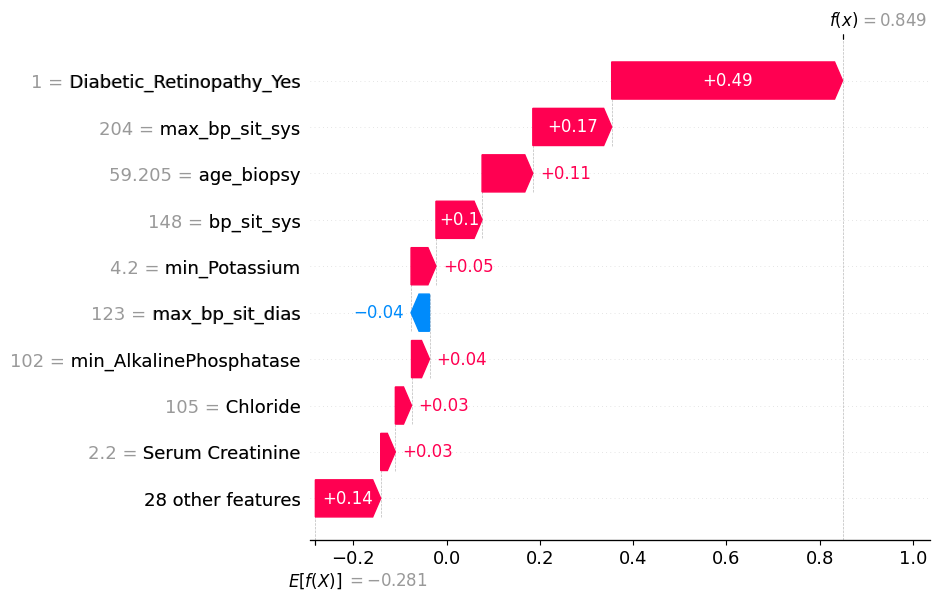

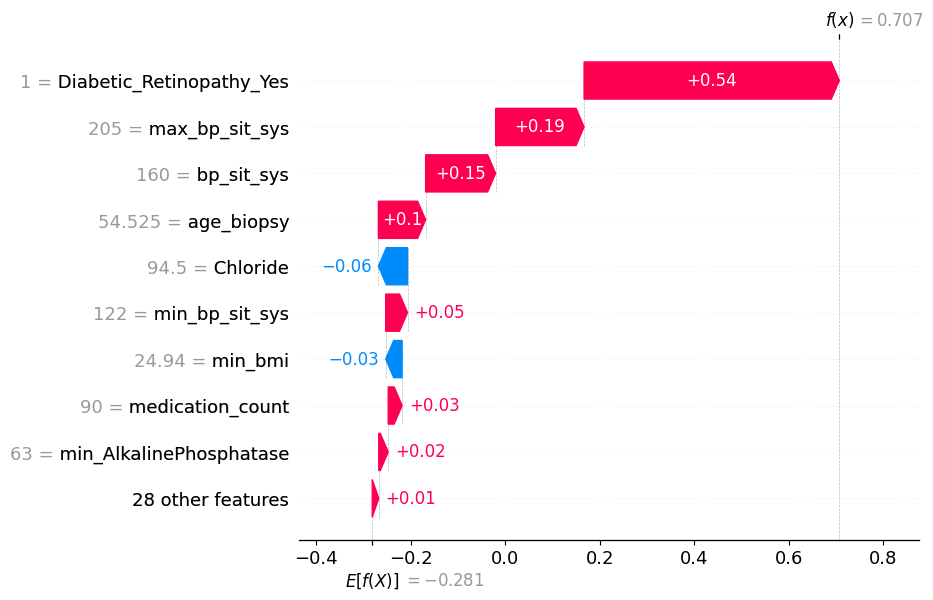

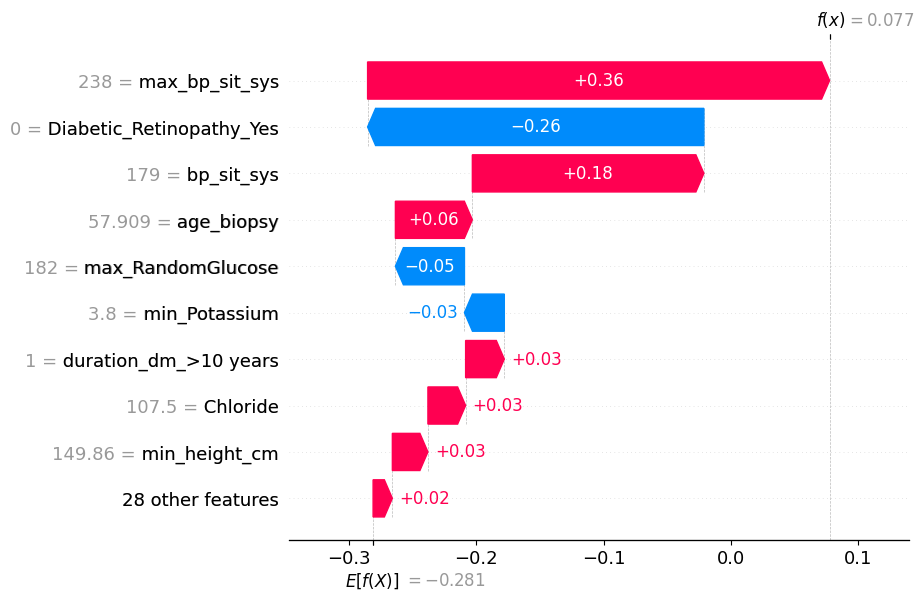

In [8]:
# read the model files
df_model = pd.read_csv(f'{base_dir}raw_data/reprocessed_model_log.csv')

executionid = 1
    
y_pred_bin, y_pred, Y_test, model, X_test, stand, file_name_base  = preprocess_test_ds(executionid, base_dir, suffix)

# replace the proceedure codes with names
path_to_csv = f'{base_dir}raw_data/proc_mapping_file.csv'
column_list = X_test.columns.tolist()
column_list = replace_proceedure_code(path_to_csv, column_list)
X_test.columns = column_list

# create a prediction dataframe
pred_df = pd.DataFrame(Y_test)
pred_df['model_prediction'] = y_pred_bin.tolist()

outcome_var = 'is_DN_TRUE'

false_neg = np.where((pred_df[outcome_var]==1) & (pred_df['model_prediction']== False))[0].tolist()
false_pos = np.where((pred_df[outcome_var]==0) & (pred_df['model_prediction']== True))[0].tolist()

# calculate Shap values
explainer = shap.TreeExplainer(model)

shap_values_false_neg = shap_values_convert_units(X_test.iloc[false_neg], stand, explainer)
shap_values_false_pos = shap_values_convert_units(X_test.iloc[false_pos], stand, explainer)

print('false_neg')
pathname = f'{base_dir}{output_suffix}{file_name_base}_test_false_neg.pdf'
waterfall_enrich_plot(shap_values_false_neg, pathname)
print('false_pos')
pathname = f'{base_dir}{output_suffix}{file_name_base}_test_false_pos.pdf'
waterfall_enrich_plot(shap_values_false_pos, pathname)

0_years_0


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


false_neg


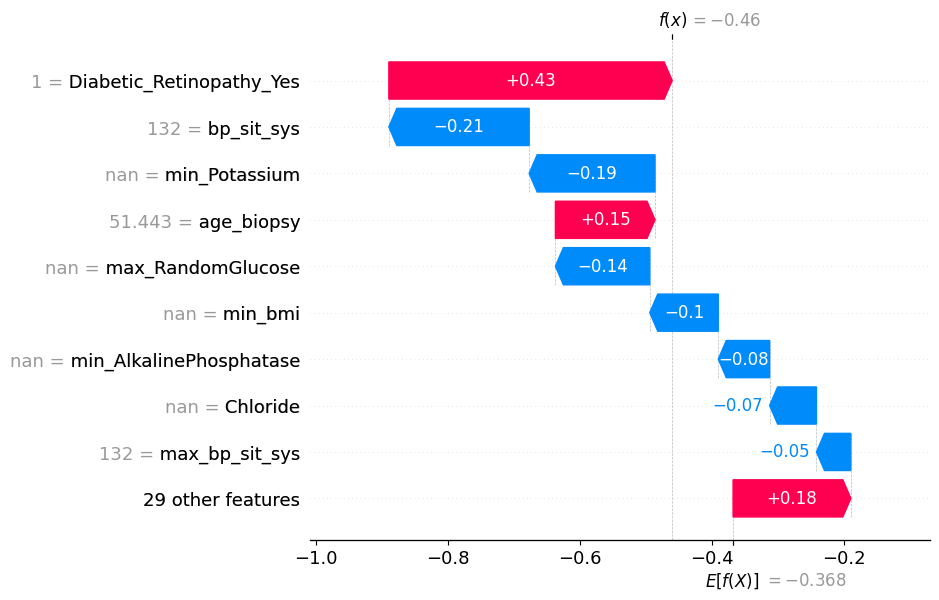

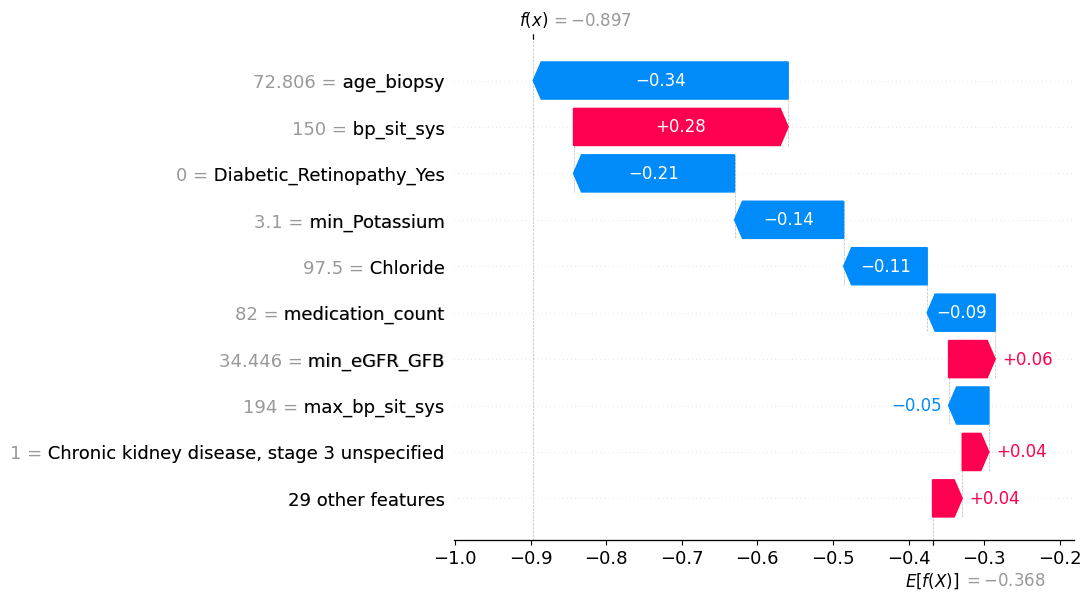

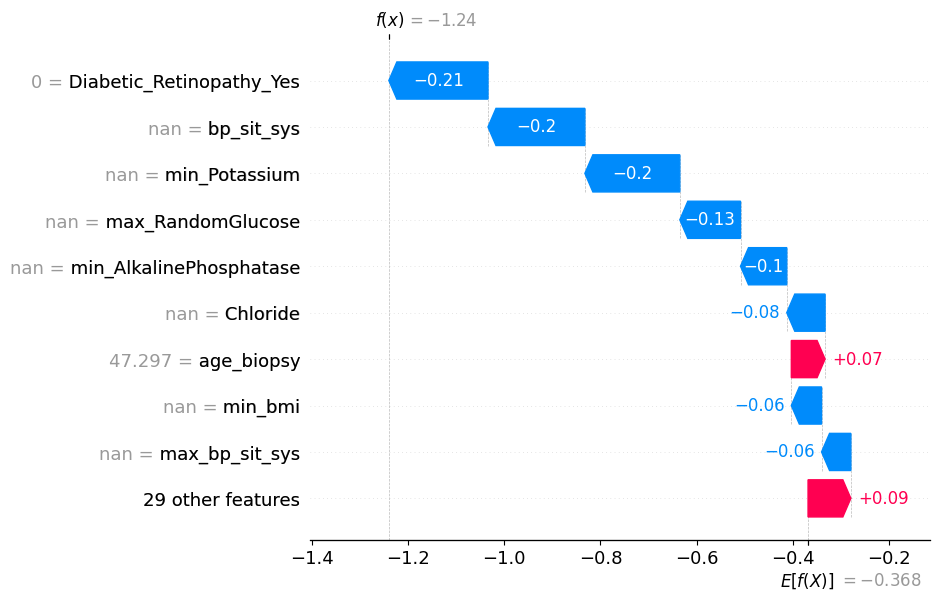

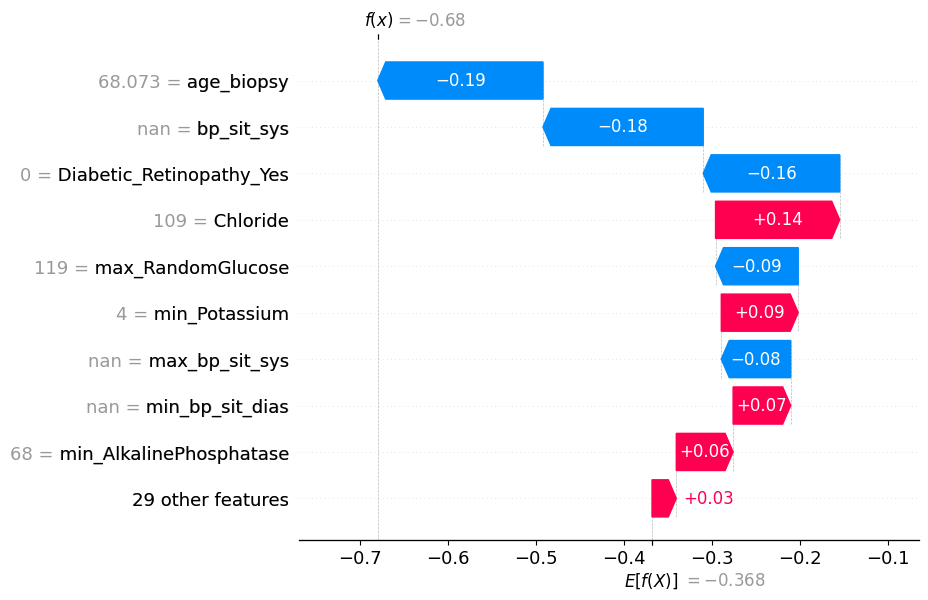

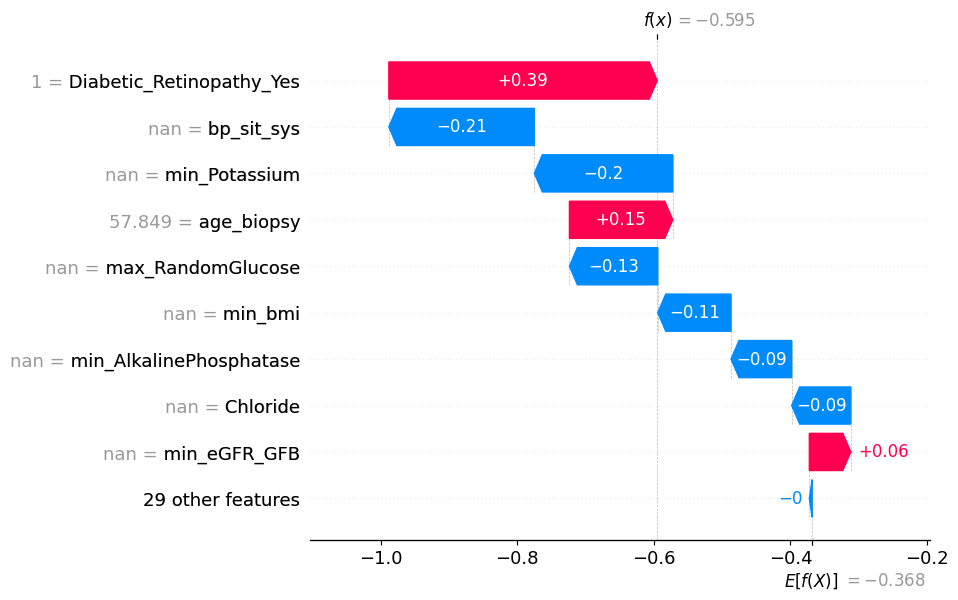

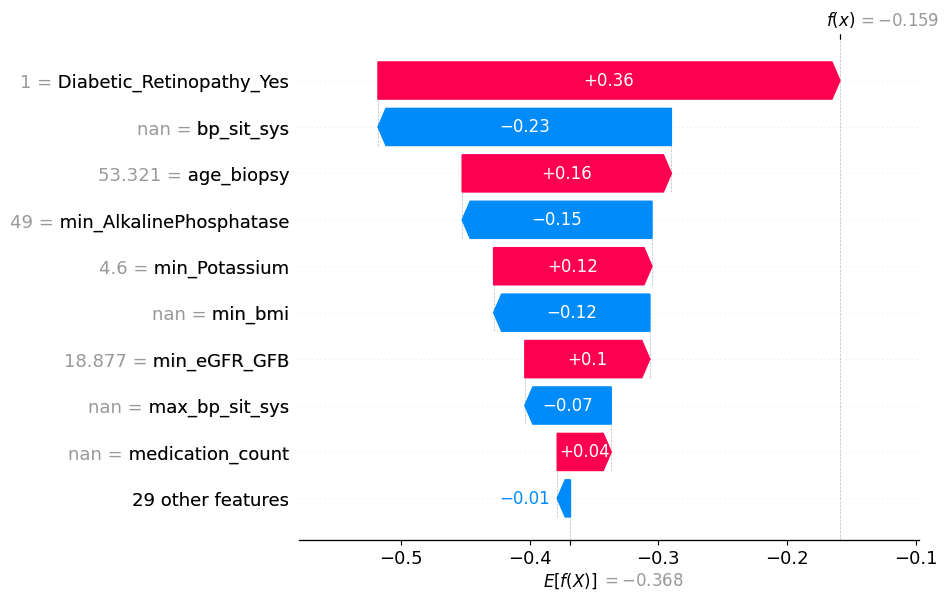

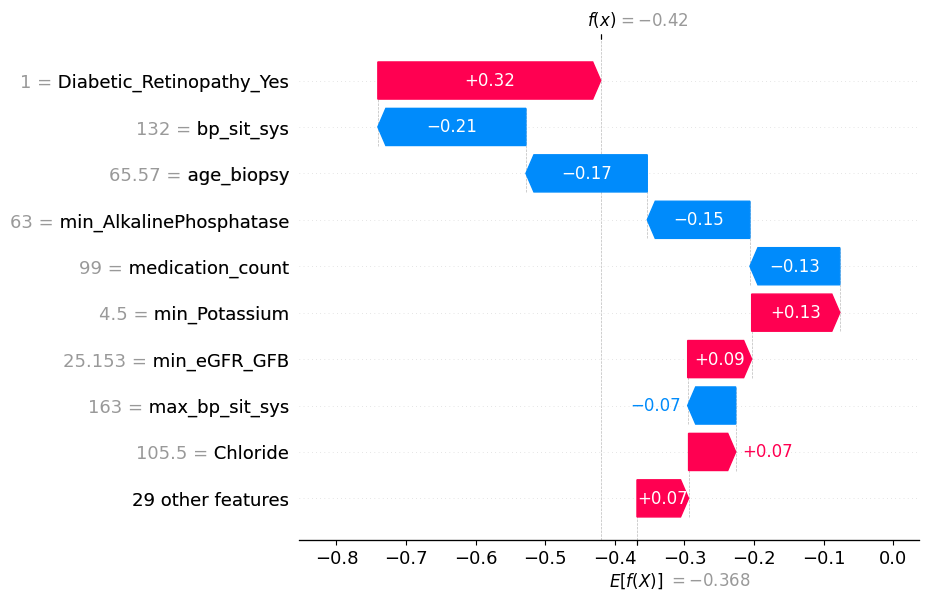

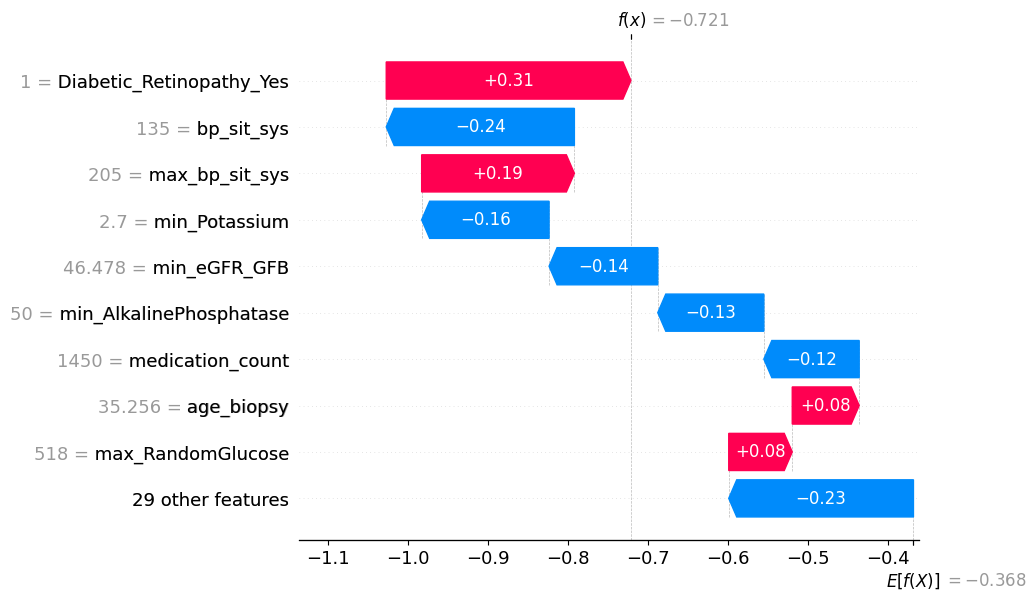

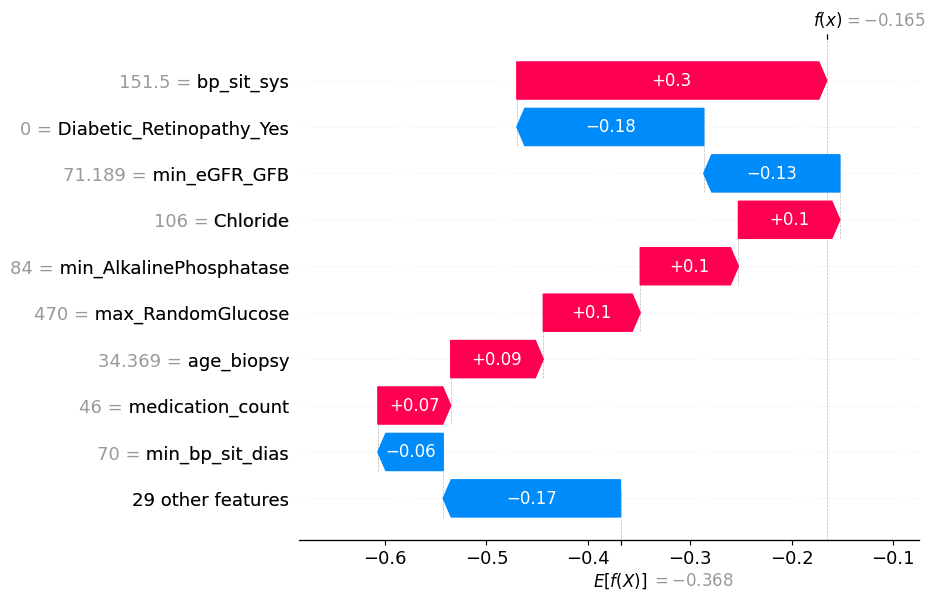

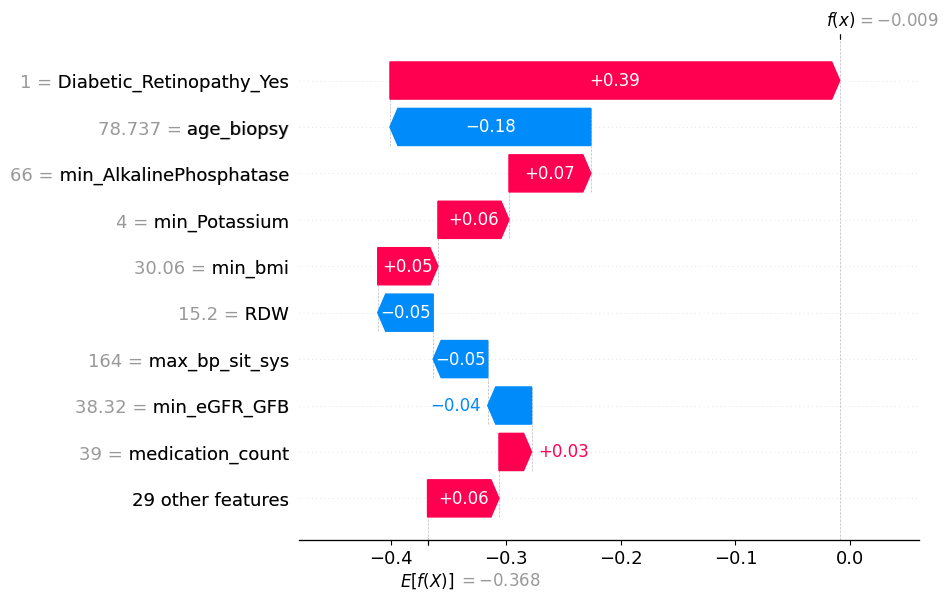

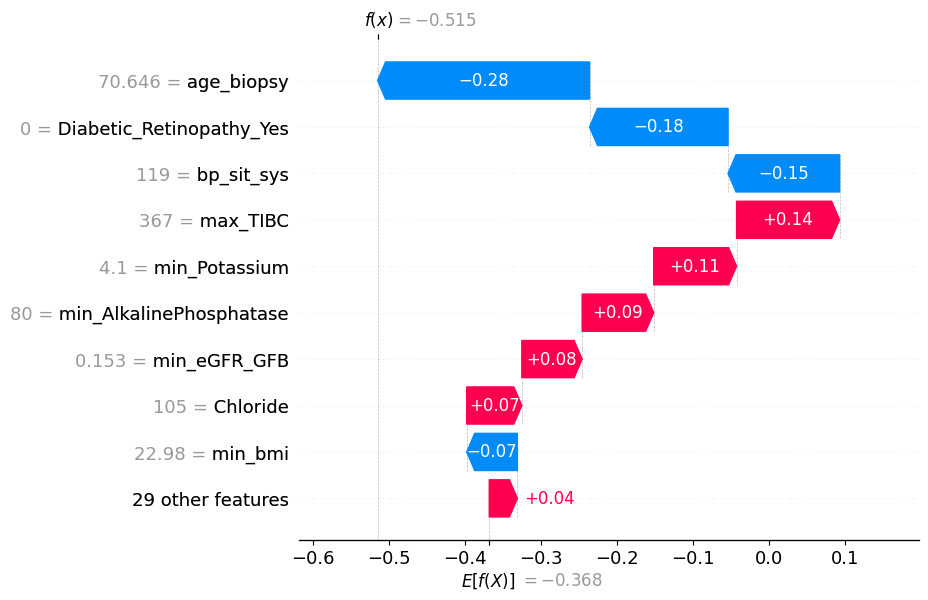

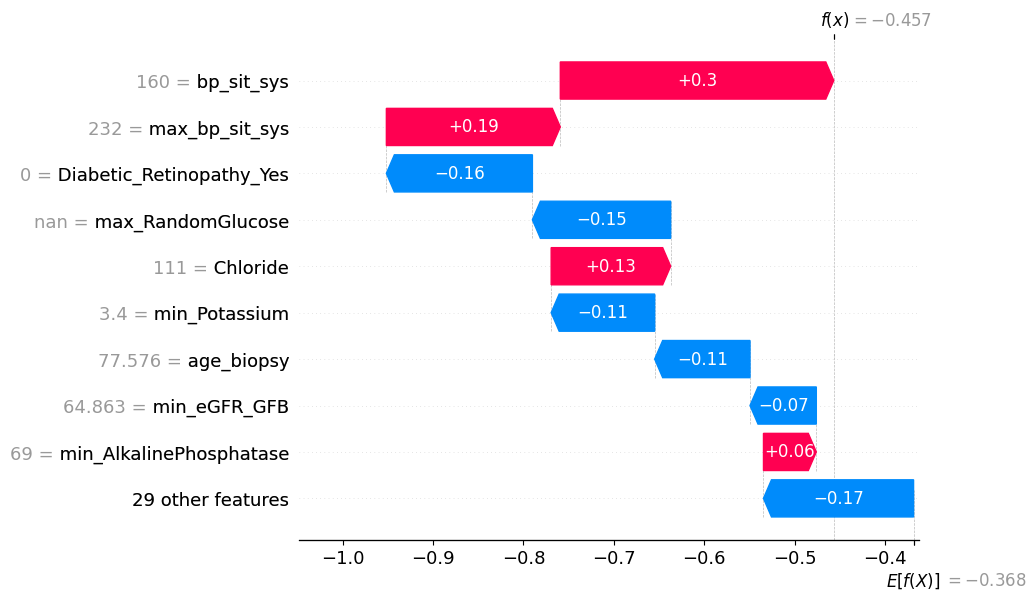

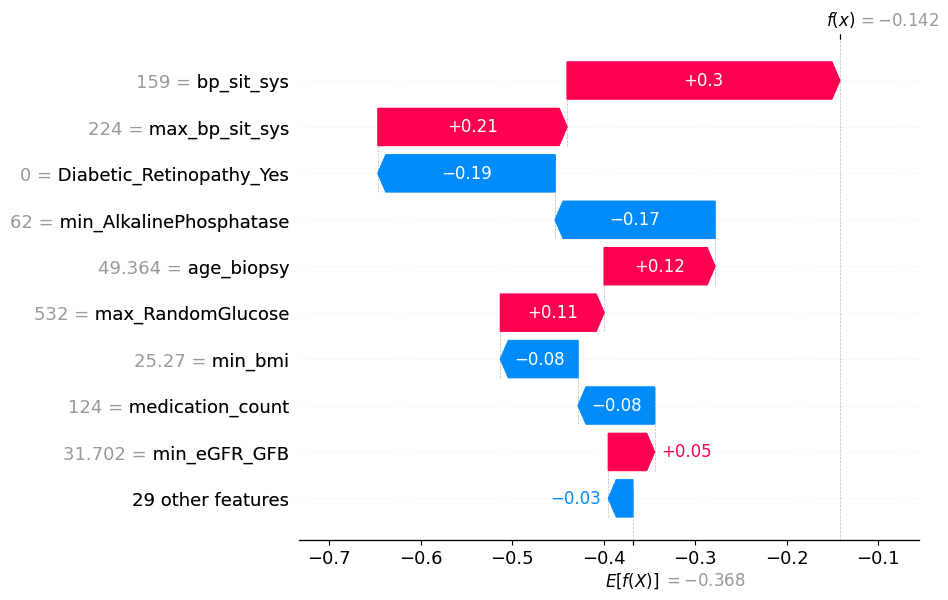

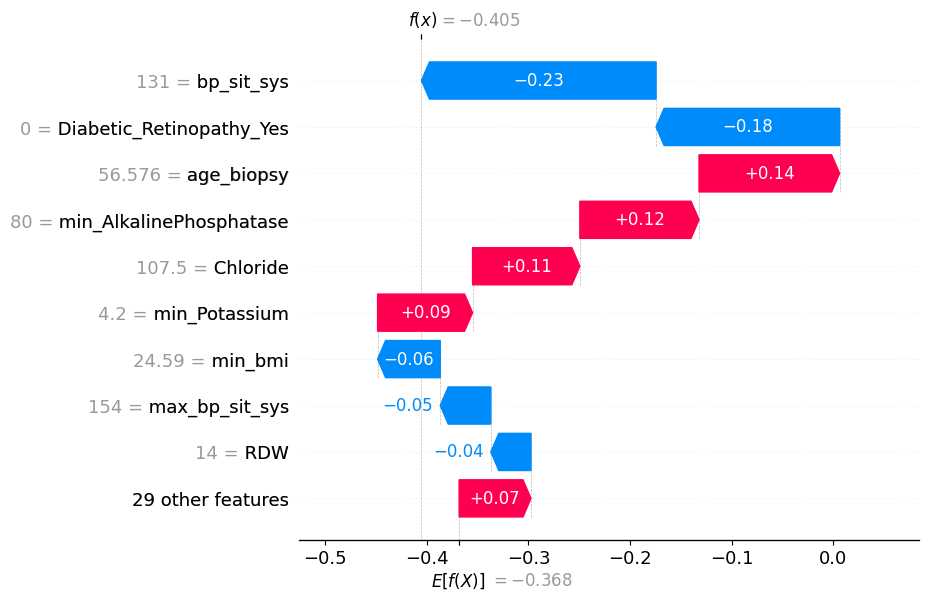

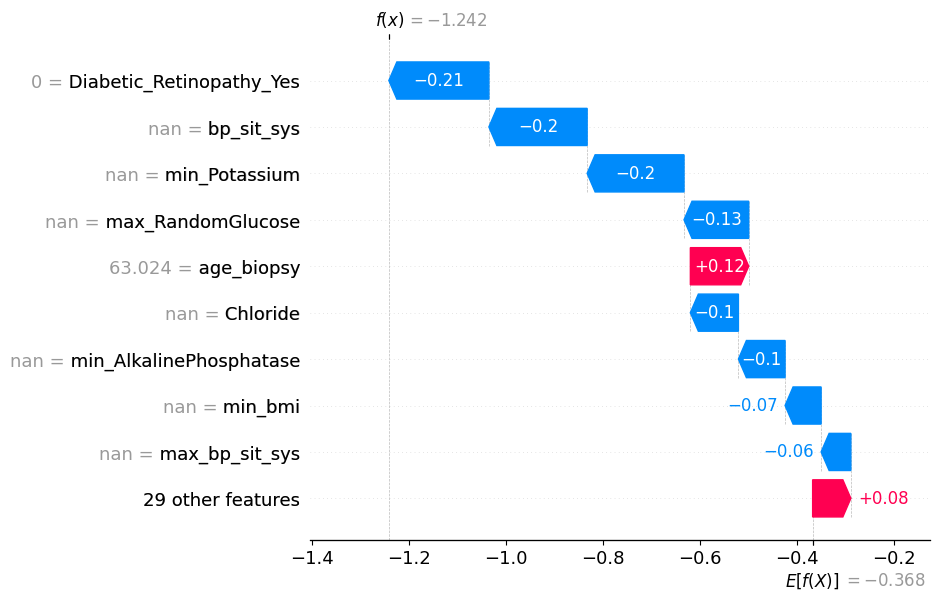

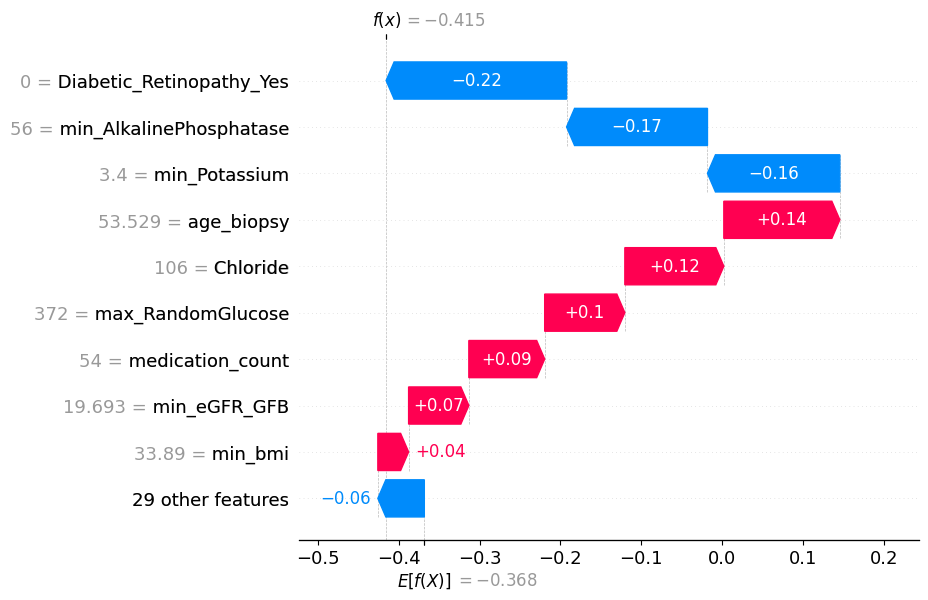

false_pos


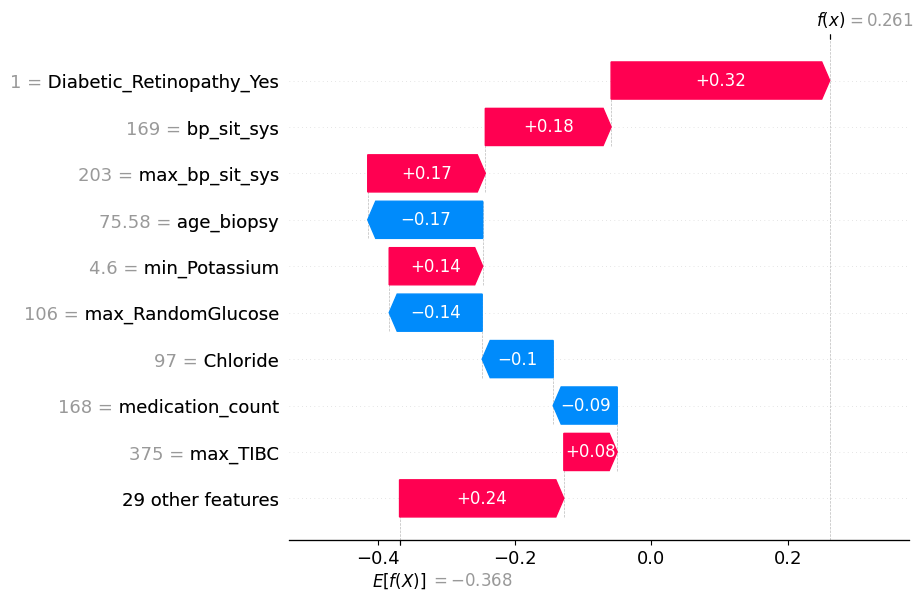

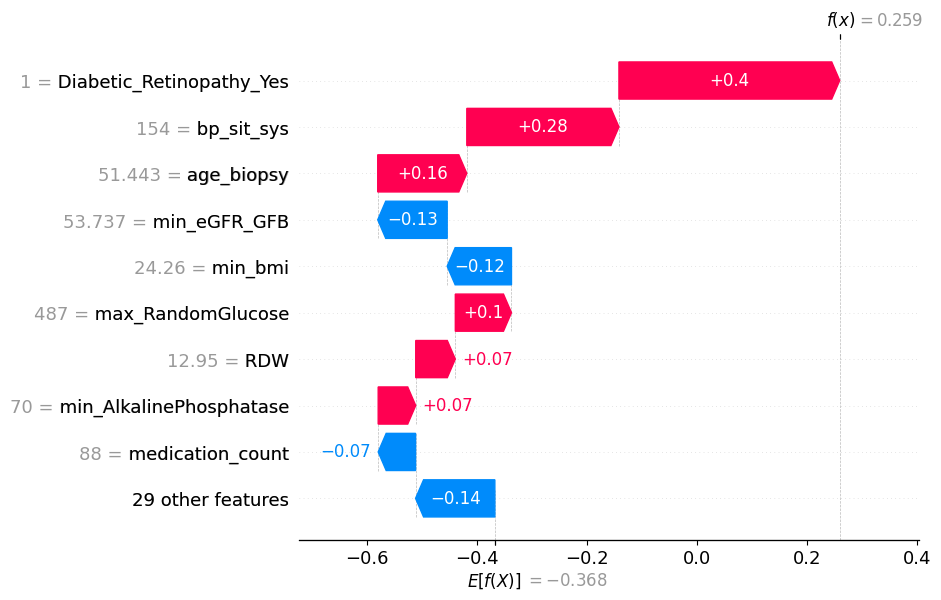

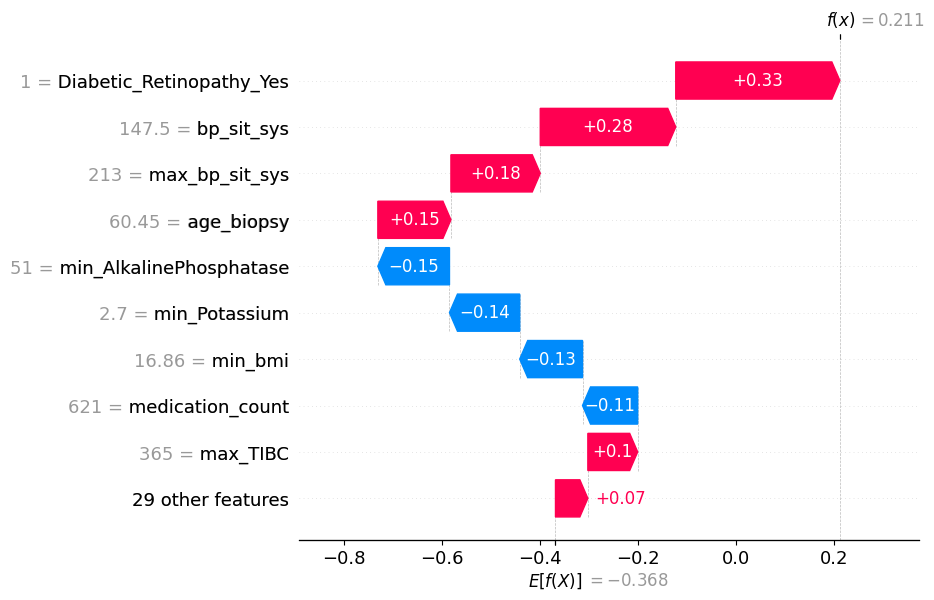

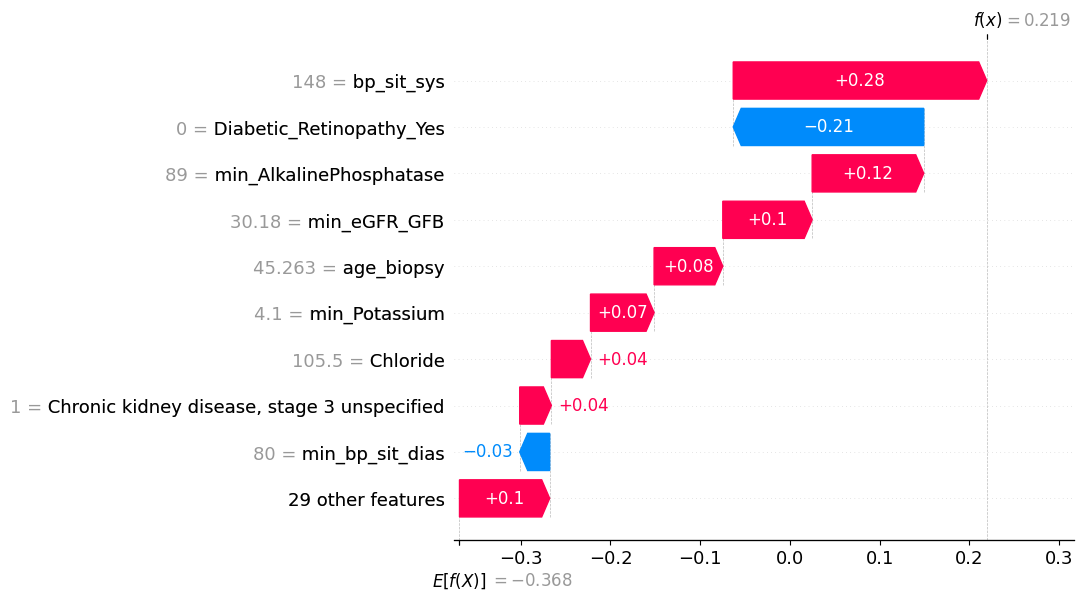

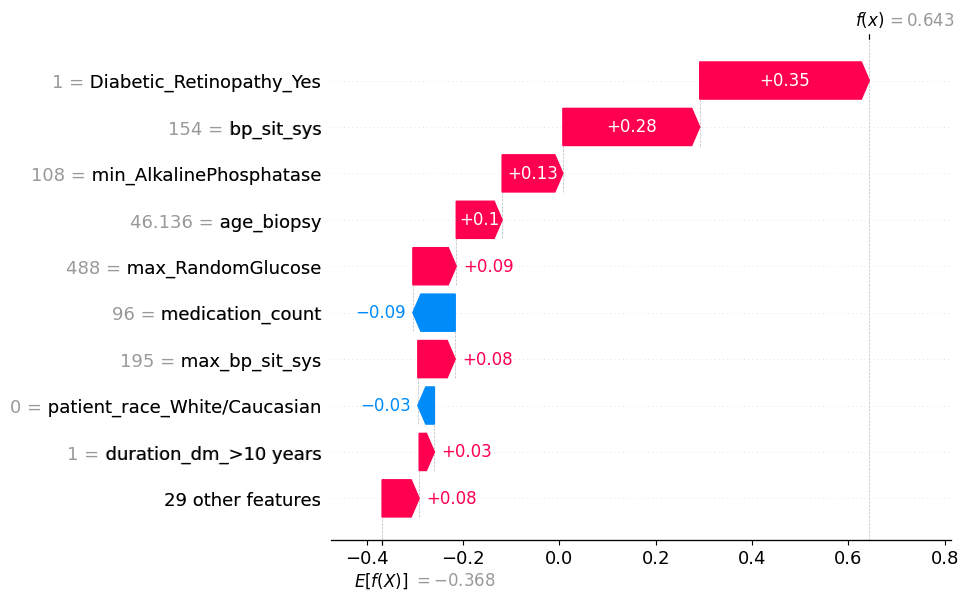

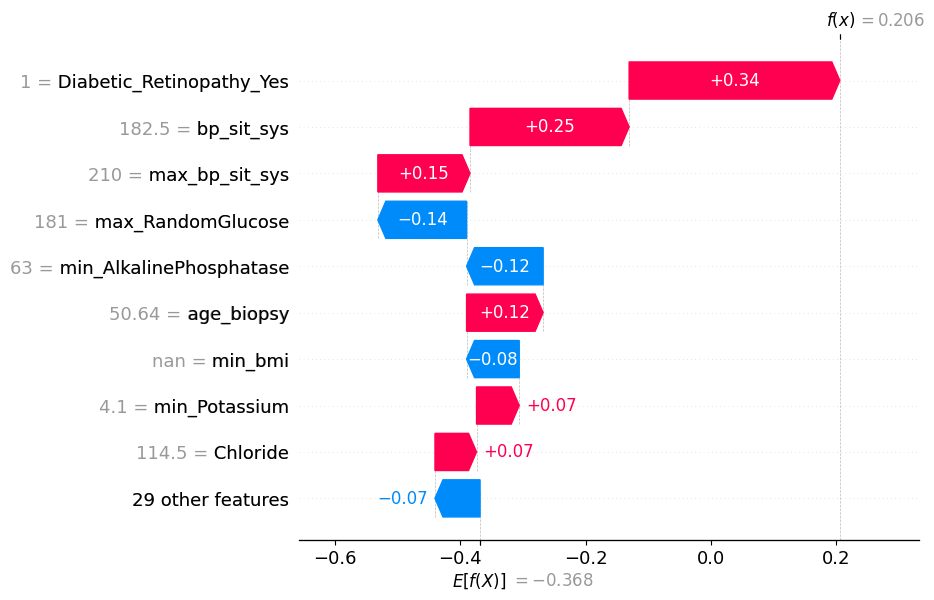

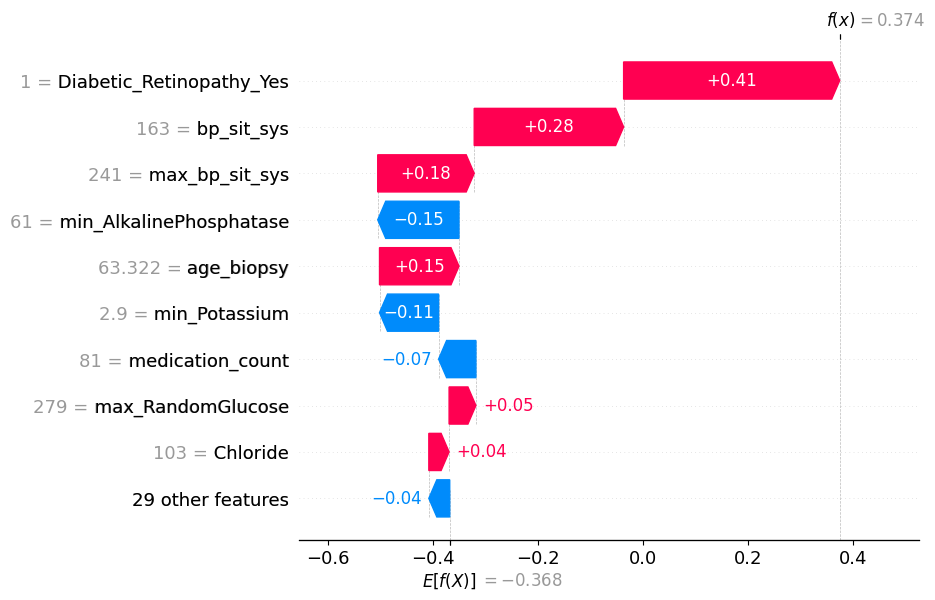

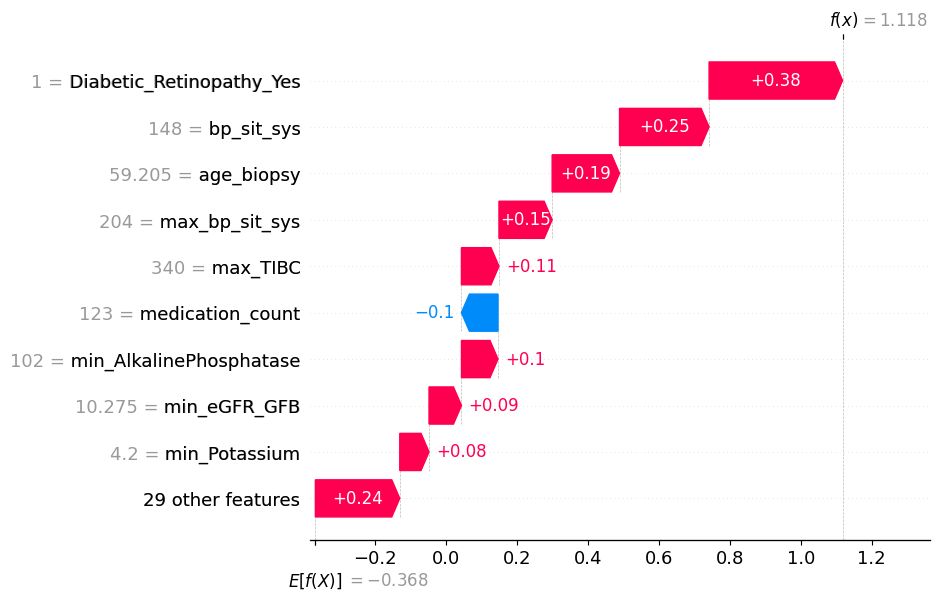

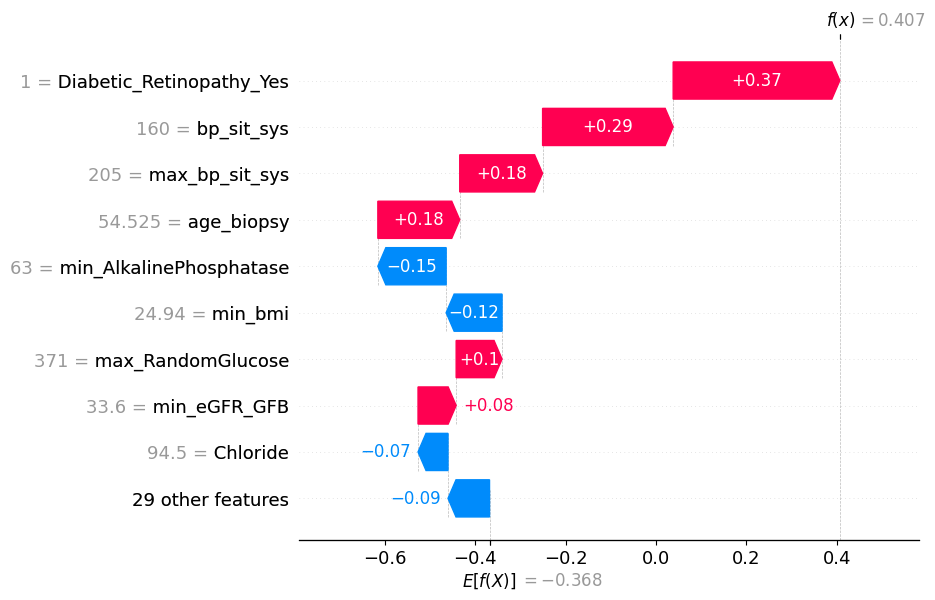

In [7]:
# read the model files
df_model = pd.read_csv(f'{base_dir}raw_data/reprocessed_model_log.csv')

executionids = df_model['ExecutionID'].tolist()

for executionid in executionids:
    
    file_name_base = str(df_model[df_model['ExecutionID'] == executionid][['aggregation_time','gap']].values[0][0]) + '_years_' + str(df_model[df_model['ExecutionID'] == executionid][['aggregation_time','gap']].values[0][1])    

    y_pred_bin, y_pred, Y_test, model, X_test, stand, input_file_name_variable  = preprocess_test_ds(executionid, base_dir, suffix, file_name_base)

    # replace the proceedure codes with names
    path_to_csv = f'{base_dir}raw_data/proc_mapping_file.csv'
    column_list = X_test.columns.tolist()
    column_list = replace_proceedure_code(path_to_csv, column_list)
    X_test.columns = column_list

    # create a prediction dataframe
    pred_df = pd.DataFrame(Y_test)
    pred_df['model_prediction'] = y_pred_bin.tolist()

    outcome_var = 'is_DN_TRUE'

    false_neg = np.where((pred_df[outcome_var]==1) & (pred_df['model_prediction']== False))[0].tolist()
    false_pos = np.where((pred_df[outcome_var]==0) & (pred_df['model_prediction']== True))[0].tolist()

    # calculate Shap values
    explainer = shap.TreeExplainer(model)

    shap_values_false_neg = shap_values_convert_units(X_test.iloc[false_neg], stand, explainer)
    shap_values_false_pos = shap_values_convert_units(X_test.iloc[false_pos], stand, explainer)

    print('false_neg')
    pathname = f'{base_dir}{output_suffix}{file_name_base}_test_false_neg.pdf'
    waterfall_enrich_plot(shap_values_false_neg, pathname)
    print('false_pos')
    pathname = f'{base_dir}{output_suffix}{file_name_base}_test_false_pos.pdf'
    waterfall_enrich_plot(shap_values_false_pos, pathname)

In [9]:
pd.show_versions()

Setuptools is replacing distutils.



INSTALLED VERSIONS
------------------
commit           : 87cfe4e38bafe7300a6003a1d18bd80f3f77c763
python           : 3.10.6.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.76-linuxkit
Version          : #1 SMP PREEMPT Mon Nov 8 11:22:26 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.0
numpy            : 1.23.3
pytz             : 2022.2.1
dateutil         : 2.8.2
setuptools       : 65.4.0
pip              : 22.2.2
Cython           : 0.29.32
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.1
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.5.0
pandas_datareader: None
bs4              : 4.11.1
bottleneck       : 1.3.5
b

In [10]:
! pip list

Package                           Version
--------------------------------- -----------
alembic                           1.8.1
altair                            4.2.0
anyio                             3.6.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
asttokens                         2.0.8
async-generator                   1.10
attrs                             22.1.0
Babel                             2.10.3
backcall                          0.2.0
backports.functools-lru-cache     1.6.4
beautifulsoup4                    4.11.1
bleach                            5.0.1
blinker                           1.4
bokeh                             2.4.3
Bottleneck                        1.3.5
brotlipy                          0.7.0
cached-property                   1.5.2
catboost                          1.1.1
certifi                           2022.9.24
certipy                           0.1.3
cffi                              1.15.1
charset-normalizer       